# Ladybird Analysis 1

# Estimating the population mean sizes of your ladybirds

## Task 1: Read in and print your spreadsheet

Using pandas, you are now going to read in the Excel spreadsheet you just created with your group.

<div class="alert alert-danger">

Make sure that your excel spreadsheet is uploaded to the **Ladybird Analysis Notebooks** folder on Noteable, i.e., the same folder that this jupyter notebook is in.
    
</div>

1. Read in your Excel spreadsheet using the command 
```python
pd.read_excel('spreadsheet.xlsx')
```
**Make sure to replace "spreadsheet.xlsx" with whatever your spreadsheet is called otherwise you'll get a FileNotFound error.**

2. Call the DataFrame something sensible, such as `ladybirds`.

3. Print the data to make sure it is okay.

In [1]:
import pandas as pd
ladybugs = pd.read_csv("morningside.csv")
print(ladybugs)

    melanic  Non-melanic
0      6.50         7.00
1      7.50         7.25
2      8.25         6.50
3      6.75         6.50
4      6.00         7.00
5      7.00         8.00
6      7.00         7.50
7      7.00         7.50
8      9.00         7.00
9      6.00         6.00
10     6.50         7.00
11     9.00         6.50
12     7.50         7.00
13     8.00         8.00
14     8.00         7.50
15     7.50         7.50
16     7.50         7.00
17     6.00         7.00
18     6.00         7.00
19     7.00         7.00
20     6.00         6.00
21      NaN         6.50


## Task 2: Plot the distribution of melanic ladybird sizes

Plot the melanic ladybird sizes in an annotated histogram in the following code cell. See the *Visualsing data* section of [Coding 3 - Working with data](../Coding%20Practicals%20Notebooks/Coding%203%20-%20Working%20with%20data.ipynb#Visualising-data) for help.

<div class="alert alert-success">

Note: In Task 1 you imported pandas and read in your spreadsheet. Jupyter Notebooks remember that you did this. Which means you do not need to import pandas nor read in your spreadsheet again in any of the following code cells.
</div>

Text(26.64469444444444, 0.5, 'count')

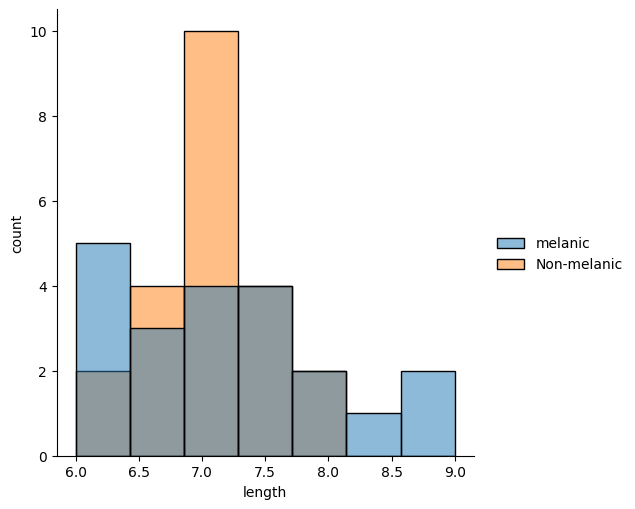

In [2]:
import seaborn as sns

g = sns.displot(ladybugs)
g.ax.set_xlabel("length")
g.ax.set_ylabel("count")

## Task 3: Check for outliers

A histogram allows you to easily spot any outliers; that is data that are **extremely** far from the average. Perhaps the wrong species was measured or you entered 45 instead of 4.5 into the spreadsheet. 

If you are uncertain whether a value is an outlier you should leave it in your dataset. For example, a size of 11mm may seem large, but perhaps you've just found a particularly large ladybird. Only clearly erroneous values should be removed or changed.

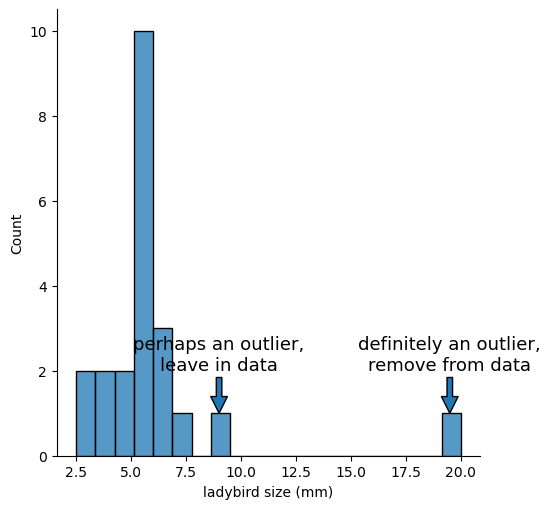

If you think any of the data are outliers you'll need to go back to your spreadsheet, update it and re-upload to Noteable.

## Task 4: Eye-ball estimates of the sample mean and sample standard deviation

It is generally a good idea to roughly estimate means and standard deviations by eye before calculating them on a computer. This is so you can check your eye-ball estimates with the actual values output by Python. If they don't match then you know something is wrong: either your estimates or the Python code.

Using your histogram, estimate the mean and standard deviation of melanic ladybird sizes. Remember that a rough estimate of the standard deviation is given by this formula

$$s \approx \frac{\mathrm{max\ value} - \mathrm{min\ value}}{4}$$


> Write your estimates here

## Task 5: Calculate the sample size, sample mean and sample standard deviation

Now, using Python code, calculate the sample size, mean and standard deviation of the melanic ladybird sizes in the following code cell to the appropriate number of decimal places. (See Notebook [3.3 - Normal distribution](../Self-study%20Notebooks/3.3%20-%20Normal%20distribution.ipynb#Find-the-sample-size,-mean-and-standard-deviation))

How do they compare to your eye-ball estimates?

In [3]:
m_n = ladybugs["melanic"].count()
m_mean = ladybugs["melanic"].mean()
m_std = ladybugs["melanic"].std()

print("size:", m_n)
print("mean:", m_mean)
print("SD:", m_std)

size: 21
mean: 7.142857142857143
SD: 0.940649471679769


## Task 6: Check if the data obey the 68-95-99.7% rule

Now you should check to see if the data are roughly normally distributed.

1. Check if roughly 68% of your data lie within one standard deviation of the mean using Python code.
2. Do you think your data are normally distributed?

<div class="alert alert-info">

To do this task you will need to calculate, using Python code, the range from the mean minus one standard deviation to the mean plus one standard deviation. Then count how many ladybirds had sizes within this range. Is that roughly 68% of your data? 
    
See the example in Notebook [3.3 Normal distribution](../Self-study%20Notebooks/3.3%20-%20Normal%20distribution.ipynb#Testing-the-rule-on-student-heights) for how to answer this Task.

</div>

percentage: 61.90%


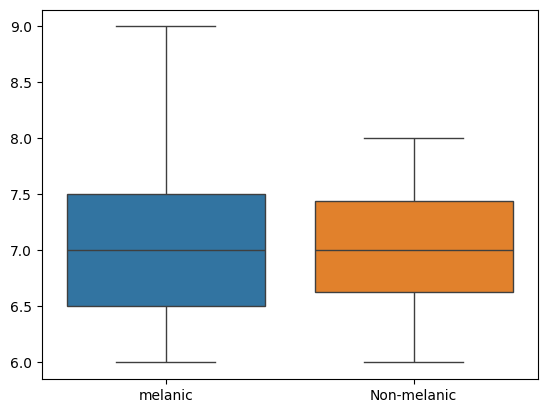

In [4]:
lbound = m_mean - m_std
hbound = m_mean + m_std
count = sum((ladybugs["melanic"] > lbound) & (ladybugs["melanic"] < hbound))
percentage = count / ladybugs["melanic"].count()

print(f"percentage: {percentage:.2%}")

g = sns.boxplot(ladybugs)

## Task 7: Calculate the precision of your estimate of the population mean

Calculate the standard error of the mean and the 95% confidence interval of the mean. (See Notebook [3.5 - Estimating a population mean](../Self-study%20Notebooks/3.5%20-%20Estimating%20a%20population%20mean.ipynb#Standard-error-of-the-mean))

## Task 8: Report your estimate of the population mean

Write a short sentence below reporting the estimate and precision of the population mean. (See Notebook [3.6 - Reporting a population mean](../Self-study%20Notebooks/3.6%20-%20Reporting%20a%20population%20mean.ipynb#Reporting-the-estimate-of-the-population-mean-and-its-standard-error))

> Report your estimate and precision

In [5]:
m_sem = m_std / m_mean ** 0.5
print(m_n, "ladybirds")
print(f"pop. mean is {m_mean:.1f} mm (95% CI {m_mean-m_sem*2:.1f}-{m_mean+m_sem*2:.1f} mm)")

21 ladybirds
pop. mean is 7.1 mm (95% CI 6.4-7.8 mm)


## Task 9: Estimate and report the population mean of the non-melanic ladybirds


If you have time, now repeat tasks 2 to 8 for the non-melanic ladybirds.

In [6]:
n_n = ladybugs["Non-melanic"].count()
n_mean = ladybugs["Non-melanic"].mean()
n_std = ladybugs["Non-melanic"].std()

print("size:", n_n)
print("mean:", n_mean)
print("SD:", n_std)

lbound = n_mean - n_std
hbound = n_mean + n_std
count = sum((ladybugs["Non-melanic"] > lbound) & (ladybugs["Non-melanic"] < hbound))
percentage = count / ladybugs["Non-melanic"].count()

print(f"percentage: {percentage:.2%}")

n_sem = n_std / n_mean ** 0.5
print(n_n, "ladybirds")
print(f"pop. mean is {n_mean:.1f} mm (95% CI {n_mean-n_sem*2:.1f}-{n_mean+n_sem*2:.1f} mm)")

size: 22
mean: 7.011363636363637
SD: 0.5371733377646314
percentage: 81.82%
22 ladybirds
pop. mean is 7.0 mm (95% CI 6.6-7.4 mm)


## Task 10: Discuss in your group what you think of your data


- How would you improve data collection in the cemetery? What would you do differently? How would you organise your group better?
- What do you think of the quality of your data? Were there problems with measuring precisely and how could you improve that?
- What do you think of the quantity of data? Could you have collected more ladybirds?

<div class="alert alert-info">

These are the types of questions you will need to think and write about in your Group Report.
    
</div>